In [22]:
import pandas as pd
import os
from mapboxgl.utils import *
from mapboxgl.viz import *

import pandas as pd
# Load Data Set
year  = "2020"
month = "08"
URL = f"https://data.urbansharing.com/oslobysykkel.no/trips/v1/{year}/{month}.csv"
o_df = pd.read_csv(URL)
#headn command is used to get the 5 top coloums in the dataset

token = "pk.eyJ1IjoibWFwYm94IiwiYSI6ImNpejY4NXVycTA2emYycXBndHRqcmZ3N3gifQ.rJcFIG214AriISLbB6B5aw"
o_df.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2020-08-01 00:04:12.542000+00:00,2020-08-01 00:08:33.462000+00:00,260,423,Schous plass,nærmest rundkjøringen,59.920335,10.760804,460,Botanisk Hage sør,langs Jens Bjelkes gate,59.915418,10.769330
1,2020-08-01 01:54:23.528000+00:00,2020-08-01 02:01:20.350000+00:00,416,412,Jakob kirke,langs Torggata,59.917866,10.754898,503,Fagerheimgata,ved Dælenenga busstopp,59.927606,10.765985
2,2020-08-01 03:00:08.082000+00:00,2020-08-01 03:10:36.755000+00:00,628,407,Sagene bussholdeplass,langs Kierschovs gate,59.937743,10.751648,599,Paléhaven,langs Strandgata,59.910331,10.750110
3,2020-08-01 03:00:19.792000+00:00,2020-08-01 03:05:55.369000+00:00,335,579,Bogstadveien,ved Sporveisgata,59.924732,10.724628,623,7 Juni Plassen,langs Henrik Ibsens gate,59.915060,10.731272
4,2020-08-01 03:00:40.721000+00:00,2020-08-01 03:13:23.463000+00:00,762,525,Myraløkka Øst,ved Bentsenbrua,59.937205,10.760581,585,Nordre gate,ved Grünerbrua,59.921150,10.754714


In [23]:
o_df["started_at"]= pd.to_datetime(o_df["started_at"]) 
o_df["ended_at"]= pd.to_datetime(o_df["ended_at"])
o_df['Ukedag'] = o_df['started_at'].dt.day_name()

In [24]:
df = o_df[["started_at","Ukedag","start_station_id","end_station_id"]]
df = df.rename(columns={"start_station_id":"sId","end_station_id":"eId"})
df.head()

,started_at,Ukedag,sId,eId
0,2020-08-01 00:04:12.542000+00:00,Saturday,423,460
1,2020-08-01 01:54:23.528000+00:00,Saturday,412,503
2,2020-08-01 03:00:08.082000+00:00,Saturday,407,599
3,2020-08-01 03:00:19.792000+00:00,Saturday,579,623
4,2020-08-01 03:00:40.721000+00:00,Saturday,525,585


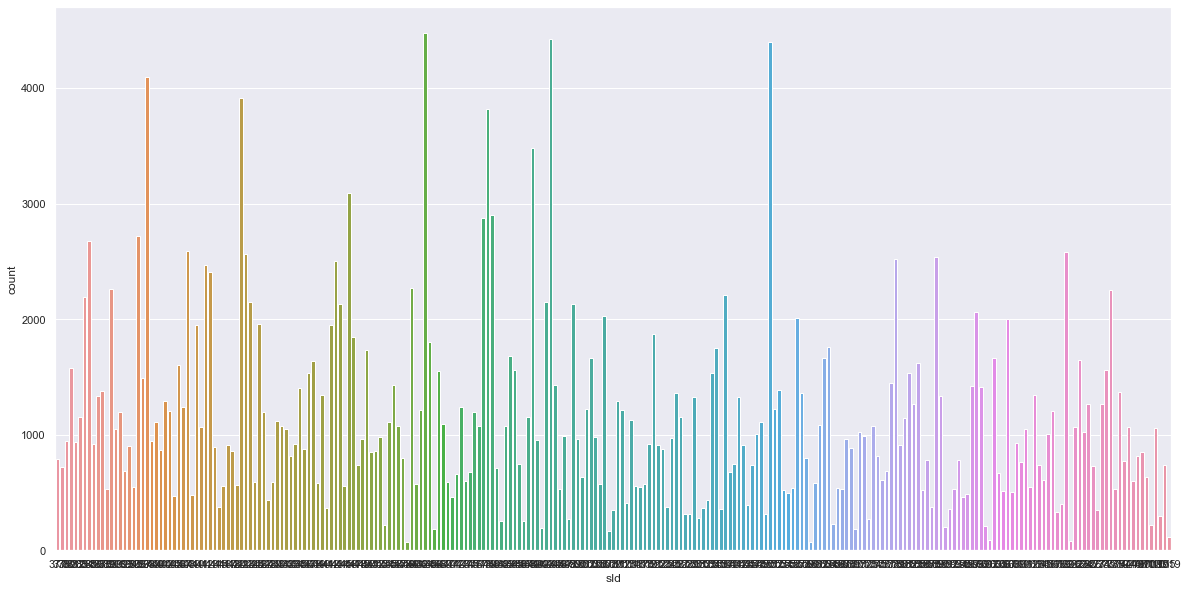

In [25]:
import seaborn as sns
from matplotlib import pyplot

sns.set_theme(style="darkgrid")

# titanic = sns.load_dataset("titanic")
fig, ax = pyplot.subplots(figsize=[20,10])


ax = sns.countplot(x="sId", data=df)

In [5]:
o_df.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,Ukedag
0,2020-10-01 03:00:30.500000+00:00,2020-10-01 03:16:08.174000+00:00,937,447,Kværnerbyen,langs Smeltedigelen,59.904473,10.786167,406,Carl Berners plass sør,langs Finnmarkgata,59.925070,10.775996,Thursday
1,2020-10-01 03:00:32.536000+00:00,2020-10-01 03:03:04.912000+00:00,152,412,Jakob kirke,langs Torggata,59.917866,10.754898,495,Vaterlandsparken,langs Brugata,59.913516,10.757335,Thursday
2,2020-10-01 03:01:02.157000+00:00,2020-10-01 03:11:52.061000+00:00,649,404,Oslo Handelsgymnasium,ved Solligata,59.914306,10.720202,412,Jakob kirke,langs Torggata,59.917866,10.754898,Thursday
3,2020-10-01 03:04:26.122000+00:00,2020-10-01 03:14:25.507000+00:00,599,556,Pilestredet,ved Sporveisgata,59.926224,10.729625,439,Mølleparken,ved Sannerbrua,59.928393,10.755969,Thursday
4,2020-10-01 03:13:50.493000+00:00,2020-10-01 03:20:26.252000+00:00,395,734,Nylandsveien,ved Urtegata,59.915660,10.762281,611,Bankplassen,ved Kirkegata,59.908454,10.741869,Thursday


In [6]:
class station:
    def __init__(self, id,longitude,latitude,name,change = 0):
        self.id = id
        self.long = longitude
        self.lat = latitude
        self.name = name
        self.change = change
    
    def updateChange(self, tick):
        self.change += tick
    
    def getId(self):
        return self.id
    def getName(self):
        return self.name
    def getLongLat(self):
        return [self.long,self.lat]
    def getChange(self):
        return self.change
    def export(self):
        return [self.id,self.name,self.long,self.lat,self.change]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158784 entries, 0 to 158783
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   started_at  158784 non-null  datetime64[ns, UTC]
 1   Ukedag      158784 non-null  object             
 2   sId         158784 non-null  int64              
 3   eId         158784 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
o_df = o_df.sort_values('start_station_id', ascending=False)
sdf = o_df.drop_duplicates(subset='start_station_name', keep='first')
sdf = sdf.sort_values('start_station_id', ascending=True)
sdf.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,Ukedag
135010,2020-10-25 12:39:10.022000+00:00,2020-10-25 12:50:08.018000+00:00,657,377,Tøyenparken,ved Caltexløkka,59.915667,10.777566,543,Fyrstikktorget,ved Karoline Kristiansens vei,59.913816,10.798093,Sunday
1058,2020-10-01 05:57:56.278000+00:00,2020-10-01 06:10:59.514000+00:00,783,378,Colosseum Kino,langs Fridtjof Nansens vei,59.929843,10.711285,572,Skøyen,under broen,59.922269,10.679580,Thursday
16920,2020-10-03 05:23:36.165000+00:00,2020-10-03 05:26:17.674000+00:00,161,380,Bentsebrugata,rett over busstoppet,59.939230,10.759170,383,Arkitekt Rivertz Plass,langs Uelands gate,59.934936,10.749466,Saturday
98064,2020-10-16 18:20:53.446000+00:00,2020-10-16 18:33:45.224000+00:00,771,381,Grønlands torg,ved Tøyenbekken,59.912520,10.762240,424,Birkelunden,langs Seilduksgata,59.925611,10.760926,Friday
147927,2020-10-28 17:53:54.920000+00:00,2020-10-28 17:59:13.438000+00:00,318,382,Stensgata,ved trikkestoppet,59.929586,10.732839,579,Bogstadveien,ved Sporveisgata,59.924732,10.724628,Wednesday


In [9]:
listOfStations=[]
for index, row in sdf.iterrows():
    tmp = station(row[3],row[6],row[7],row[4])
    listOfStations.append(tmp)

In [10]:
for index, row in o_df.iterrows():
    sId = row[3]
    eId = row[8]
    for s in listOfStations:
        if s.getId() == sId:
            s.updateChange(-1)
            sId=False
        if s.getId() == eId:
            s.updateChange(1)
            eId=False
        if not sId and not eId:
            break

In [11]:
newDf = pd.DataFrame(columns = ["Id", "Name", "Longitude", "Latitude", "Change"])


In [12]:
newDf.head()

,Id,Name,Longitude,Latitude,Change


In [13]:
for s in listOfStations:
    series = pd.Series(s.export(), index = newDf.columns)

    newDf = newDf.append(series, ignore_index=True)

In [14]:
column = newDf["Change"]

max_value = column.sum()
max_value

0

In [15]:
from mapboxgl.utils import create_color_stops, df_to_geojson
from mapboxgl.viz import CircleViz

In [16]:
df_to_geojson(newDf, filename='points.geojson',
              properties=['Id', 'Name','Change'],
              lon='Latitude', lat='Longitude', precision=3)

{'type': 'file', 'filename': 'points.geojson', 'feature_count': 249}

In [17]:
center =(10.77837,59.928349)
zoom = 10

# Generate data breaks and color stops from colorBrewer
color_breaks = [-2000,-1000,-100,-10, 0,10,100,1000,2000]
color_stops = create_color_stops(color_breaks, colors='Spectral')

# Create the viz from the dataframe
viz = CircleViz('points.geojson',
                access_token=token,
                height='500px',
                radius=3,
                color_property = "Change",
                color_stops = color_stops,
                center = center,
                zoom = zoom,
                below_layer = 'waterway-label'
              )
viz.show()

D:\Programering\Programmer\Anaconda\envs\dave3625\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


![img/vizchange.png](img/vizchange.png)

In [18]:
# Create a clustered circle map
color_stops = create_color_stops([1, 5, 10, 15], colors='YlOrBr')

viz4 = ClusteredCircleViz('points.geojson', 
                          access_token=token,
                          color_stops=color_stops,
                          stroke_color='black',
                          radius_stops=[[1, 5], [10, 10], [50, 15], [100, 20]],
                          radius_default=2,
                          cluster_maxzoom=250,
                          cluster_radius=30,
                          label_size=12,
                          opacity=0.9,
                          center=center,
                          zoom=zoom)
viz4.show()

![img/visclust.png](img/visclust.png)

In [19]:

heatmap_color_stops = create_color_stops([0.01, 0.25, 0.5, 0.75, 1], colors='RdPu')
heatmap_radius_stops = [[0, 2], [1, 40]] # increase radius with zoom

color_breaks = [round(newDf["Change"].quantile(q=x*0.1), 2) for x in range(2, 10)]
color_stops = create_color_stops(color_breaks, colors='Spectral')

heatmap_weight_stops = create_weight_stops(color_breaks)

# Create the heatmap 
viz3 = HeatmapViz('points.geojson', 
                  access_token=token,
                  weight_property="Change",
                  weight_stops=heatmap_weight_stops,
                  color_stops=heatmap_color_stops,
                  radius_stops=heatmap_radius_stops,
                  opacity=0.8,
                  center=center,
                  height='600px',
                  zoom=zoom,
                  below_layer='waterway-label')
viz3.show()

![img/vizheat.png](img/vizheat.png)

In [20]:
# Generate data breaks and color stops from colorBrewer
measure_color = 'Change'
color_breaks = [round(newDf[measure_color].quantile(q=x*0.1), 2) for x in range(2, 10)]
color_stops = create_color_stops(color_breaks, colors='Blues')

# Generate radius breaks from data domain and circle-radius range
measure_radius = 'Change' #For testing
radius_breaks = [round(newDf[measure_radius].quantile(q=x*0.1), 2) for x in range(2, 10)]
radius_stops = create_radius_stops(radius_breaks, 0.5, 20)

# Create the viz
viz2 = GraduatedCircleViz('points.geojson', 
                          access_token=token,
                          color_property="Change",
                          color_stops=color_stops,
                          radius_property="Change",
                          radius_stops=radius_stops,
                          stroke_color='black',
                          stroke_width=0.5,
                          center=center,
                          zoom=zoom,
                          opacity=0.75,
                          below_layer='waterway-label')
viz2.show()

![img/viz2.png](img/viz2.png)